In [13]:
import torch
import pickle
import matplotlib.pyplot as plt

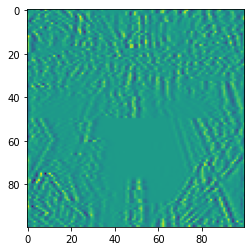

In [25]:
broken_image = torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))

In [27]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [29]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [36]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [37]:
lr= 0.8

In [44]:
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    
    loss.backward()

    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.021168982610106468
Loss at 1000 = 0.021169181913137436
Loss at 2000 = 0.02117180824279785
Loss at 3000 = 0.021170852705836296
Loss at 4000 = 0.021169014275074005
Loss at 5000 = 0.02116755023598671
Loss at 6000 = 0.021165044978260994
Loss at 7000 = 0.02116510272026062
Loss at 8000 = 0.0211646668612957
Loss at 9000 = 0.021165061742067337
Loss at 10000 = 0.021163437515497208
Loss at 11000 = 0.021159600466489792
Loss at 12000 = 0.02115868404507637
Loss at 13000 = 0.021156663075089455
Loss at 14000 = 0.021158164367079735
Loss at 15000 = 0.021161533892154694
Loss at 16000 = 0.021164892241358757
Loss at 17000 = 0.021167632192373276
Loss at 18000 = 0.021168867126107216
Loss at 19000 = 0.02116895094513893


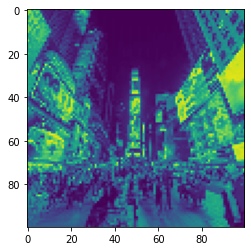

In [50]:
plt.imshow(random_tensor.view(100,100).data)